# Exploration of NaNs in the data
Different Notebook to the enormous [Exploration](exploration.ipynb) one. This one is just to explore the NaNs in the data.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [2]:
# Import helpers (we can reload this if we make modifications)
from helpers import *
from implementations import *

In [14]:
# Raw Data
test_data_raw_df = pd.read_csv('data/test.csv')
train_data_raw_df = pd.read_csv('data/train.csv')
test_Y_raw, test_X_raw, test_ids_raw = load_csv_data('data/test.csv')
train_Y_raw, train_X_raw, train_ids_raw = load_csv_data('data/train.csv')

In [15]:
test_data_raw_df


,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,?,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
1,350001,?,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,?,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,?,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,?,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568233,918233,?,105.668,46.443,60.048,156.191,0.403,47.746,0.936,1.279,...,2.273,303.668,2,112.264,1.190,-0.766,41.791,0.787,-1.090,154.056
568234,918234,?,99.294,30.097,62.713,65.861,3.312,471.319,-2.611,2.294,...,1.541,266.919,2,108.698,1.293,-0.868,70.158,-2.018,2.893,178.856
568235,918235,?,108.497,9.837,65.149,18.006,-999.000,-999.000,-999.000,2.742,...,-2.064,188.648,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
568236,918236,?,96.711,20.006,66.942,29.761,-999.000,-999.000,-999.000,2.479,...,-0.511,212.565,1,30.863,1.460,2.637,-999.000,-999.000,-999.000,30.863


In [16]:
train_data_raw_df

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,b,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,...,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249996,349996,b,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,...,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249997,349997,s,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,...,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992
249998,349998,b,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,...,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [17]:
test_X_raw_df = pd.DataFrame(test_X_raw)
test_X_raw_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,...,2.022,98.556,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
1,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,...,-1.138,176.251,1.0,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,...,-1.868,111.505,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,...,1.172,164.707,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,...,-0.231,869.614,3.0,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568233,105.668,46.443,60.048,156.191,0.403,47.746,0.936,1.279,6.133,256.853,...,2.273,303.668,2.0,112.264,1.190,-0.766,41.791,0.787,-1.090,154.056
568234,99.294,30.097,62.713,65.861,3.312,471.319,-2.611,2.294,2.889,248.582,...,1.541,266.919,2.0,108.698,1.293,-0.868,70.158,-2.018,2.893,178.856
568235,108.497,9.837,65.149,18.006,-999.000,-999.000,-999.000,2.742,18.006,68.097,...,-2.064,188.648,0.0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
568236,96.711,20.006,66.942,29.761,-999.000,-999.000,-999.000,2.479,2.739,101.676,...,-0.511,212.565,1.0,30.863,1.460,2.637,-999.000,-999.000,-999.000,30.863


In [18]:
train_X_raw_df = pd.DataFrame(train_X_raw)
train_X_raw_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,...,2.859,144.665,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,...,-0.867,80.408,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,...,-2.890,198.907,1.0,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,...,0.811,112.718,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [23]:
# Signal Nans in raw data
train_nan_df = train_X_raw_df
train_nan_df[train_nan_df == -999] = np.nan
train_nan_df
test_nan_df = test_X_raw_df
test_nan_df[test_nan_df == -999] = np.nan
test_nan_df


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,NaN,79.589,23.916,3.036,NaN,NaN,NaN,0.903,3.036,56.018,...,2.022,98.556,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
1,106.398,67.490,87.949,49.994,NaN,NaN,NaN,2.048,2.679,132.865,...,-1.138,176.251,1.0,47.575,-0.553,-0.849,NaN,NaN,NaN,47.575
2,117.794,56.226,96.358,4.137,NaN,NaN,NaN,2.755,4.137,97.600,...,-1.868,111.505,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
3,135.861,30.604,97.288,9.104,NaN,NaN,NaN,2.811,9.104,94.112,...,1.172,164.707,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,...,-0.231,869.614,3.0,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568233,105.668,46.443,60.048,156.191,0.403,47.746,0.936,1.279,6.133,256.853,...,2.273,303.668,2.0,112.264,1.190,-0.766,41.791,0.787,-1.090,154.056
568234,99.294,30.097,62.713,65.861,3.312,471.319,-2.611,2.294,2.889,248.582,...,1.541,266.919,2.0,108.698,1.293,-0.868,70.158,-2.018,2.893,178.856
568235,108.497,9.837,65.149,18.006,NaN,NaN,NaN,2.742,18.006,68.097,...,-2.064,188.648,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
568236,96.711,20.006,66.942,29.761,NaN,NaN,NaN,2.479,2.739,101.676,...,-0.511,212.565,1.0,30.863,1.460,2.637,NaN,NaN,NaN,30.863


In [140]:
# Let's see how many NaNs we have in each column, and how many rows have NaNs, for both train and test
# Also, let's see how the NaNs are correlated with the target variable
# Let's see if training and test data have similar distributions of NaNs so we can use a better strategy to deal with them, ideally training should have exaclty the same distribution as test
nans_df = train_nan_df.isnull().sum().to_frame('train')
nans_df = nans_df.join(test_nan_df.isnull().sum().to_frame('test'))
nans_df = nans_df.transpose().reset_index()
nans_df.index = nans_df['index']
nans_df = nans_df.drop('index', axis=1)
nans_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
index,,,,,,,,,,,,,,,,,,,,,
train,38114,0,0,0,177457,177457,177457,0,0,0,...,0,0,0,99913,99913,99913,177457,177457,177457,0
test,86488,0,0,0,402796,402796,402796,0,0,0,...,0,0,0,227458,227458,227458,402796,402796,402796,0


In [141]:
# drop columns with No NaNs since they match for both train and test
nans_df = nans_df.filter(nans_df.columns[nans_df.sum() > 0], axis=1)
nans_df




,0,4,5,6,12,23,24,25,26,27,28
index,,,,,,,,,,,
train,38114,177457,177457,177457,177457,99913,99913,99913,177457,177457,177457
test,86488,402796,402796,402796,402796,227458,227458,227458,402796,402796,402796


<AxesSubplot:title={'center':'Number of NaNs in each column for train and test data'}, xlabel='index'>

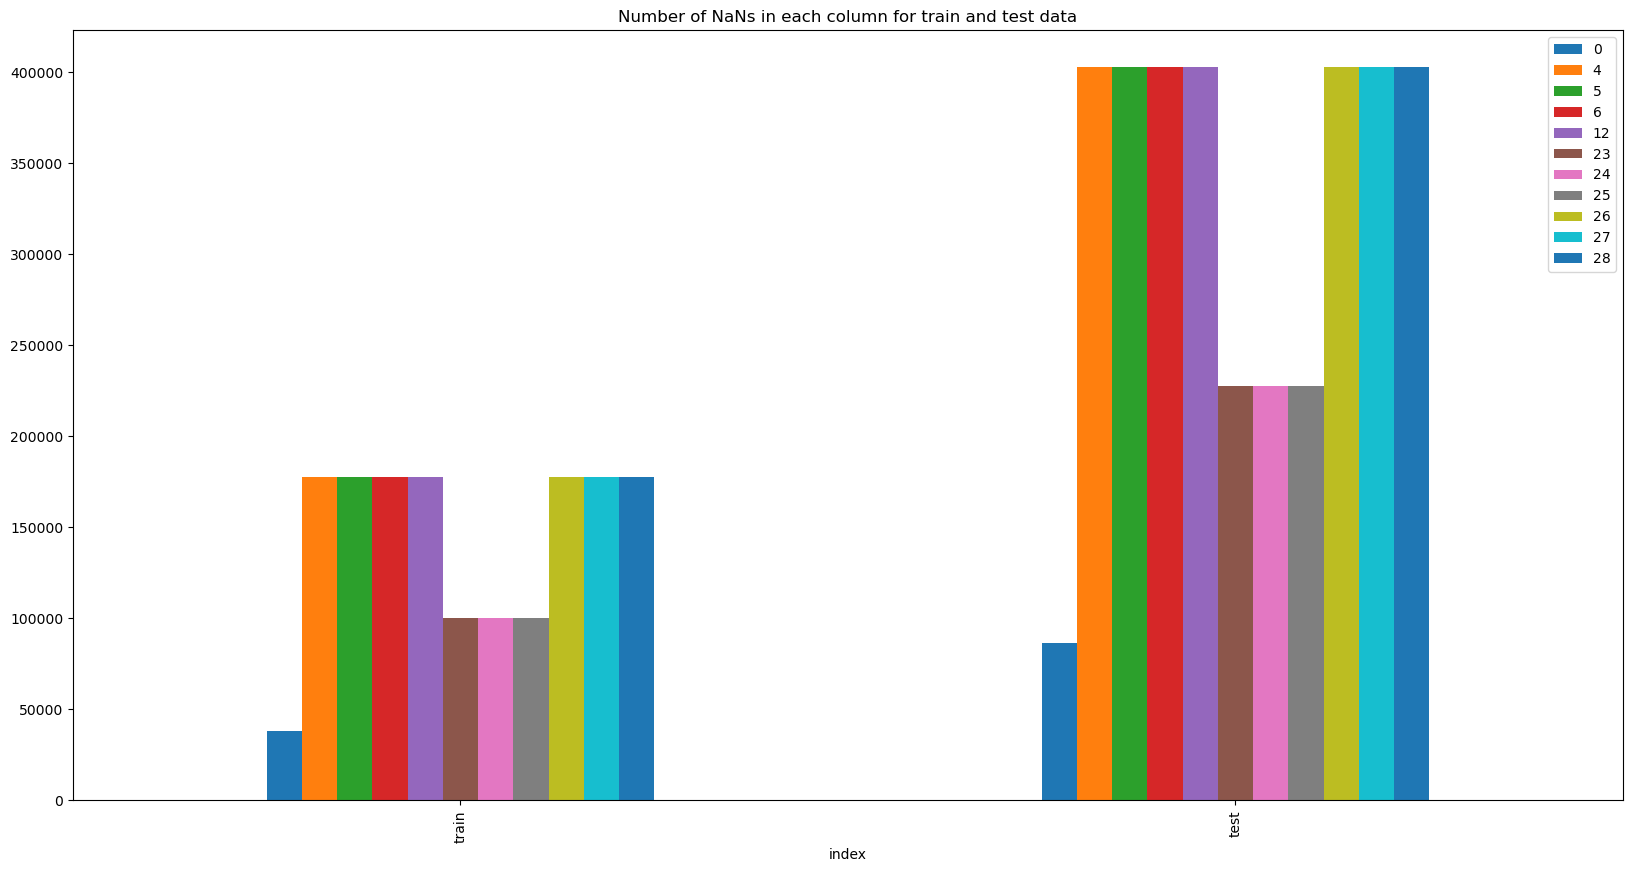

In [142]:
nans_df.plot(kind='bar', figsize=(20,10), title='Number of NaNs in each column for train and test data')

In [151]:
# Ratio of NaNs in each column to see difference in distributions

nans_ratio_df = nans_df.apply(lambda x: x / nans_df.sum(axis=1), axis=0) # each row is a ratios of NaNs in each column respective to the total number of NaNs in that row. Each ro sums to 1 (100%)
nans_ratio_df

,0,4,5,6,12,23,24,25,26,27,28
index,,,,,,,,,,,
train,0.024122,0.112311,0.112311,0.112311,0.112311,0.063234,0.063234,0.063234,0.112311,0.112311,0.112311
test,0.024102,0.112248,0.112248,0.112248,0.112248,0.063386,0.063386,0.063386,0.112248,0.112248,0.112248


<AxesSubplot:title={'center':'Ratio of NaNs in each column for train and test data'}, xlabel='index'>

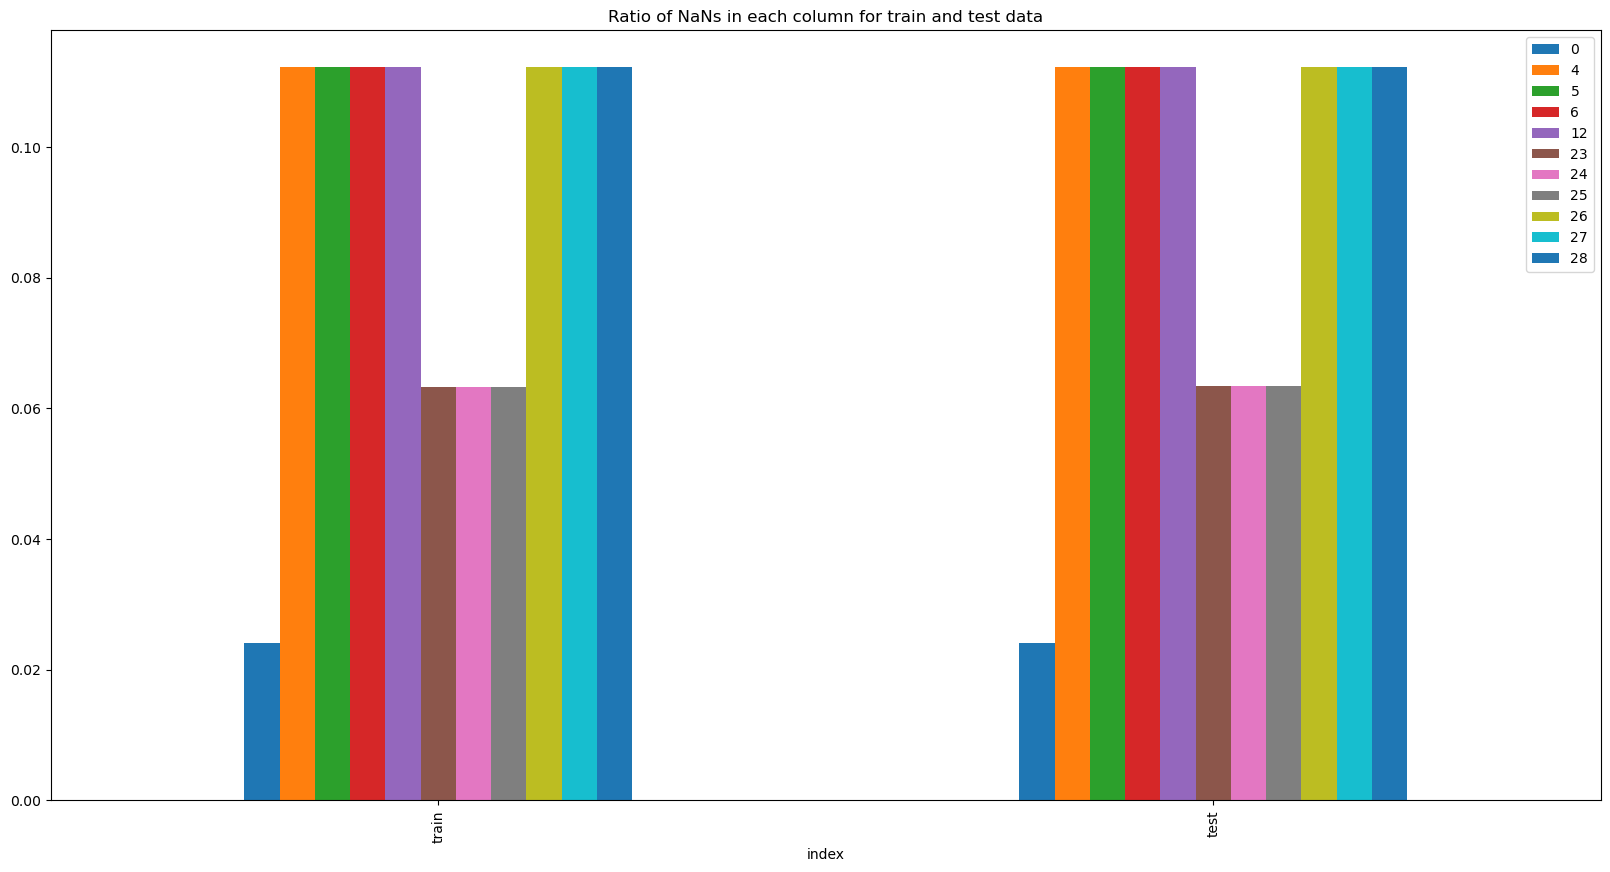

In [152]:
nans_ratio_df.plot(kind='bar', figsize=(20,10), title='Ratio of NaNs in each column for train and test data')

## Observations
- The distribution of NaNs in Train and Test data are the same. This is good. It means that training and testing data are from the same distribution (as should be).
- NaNs are not evenly distributed. Some columns have the same ratios, this is tied to the nature of the datasets and we can use these insights to make better decisions on how to handle them

## Distributions of NaNs and Relationships with Target
Let's now explore the NaNs in the data and their relationship with the target.

In [173]:
train_df = train_data_raw_df
train_df[train_df == -999] = np.nan
nans_y_df = train_df[train_df['Prediction'] == 's'].isnull().sum().to_frame('s')
nans_y_df = nans_y_df.join(train_df[train_df['Prediction'] == 'b'].isnull().sum().to_frame('b'))
nans_y_df = nans_y_df.transpose().reset_index()
nans_y_df.index = nans_y_df['index']
nans_y_df = nans_y_df.drop('index', axis=1)
nans_y_df = nans_y_df.filter(nans_y_df.columns[nans_y_df.sum() > 0], axis=1)
nans_y_df


,DER_mass_MMC,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_lep_eta_centrality,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi
index,,,,,,,,,,,
s,2835,53202,53202,53202,53202,25492,25492,25492,53202,53202,53202
b,35279,124255,124255,124255,124255,74421,74421,74421,124255,124255,124255


<AxesSubplot:title={'center':'Number of NaNs in each column for train data for s and b'}, xlabel='index'>

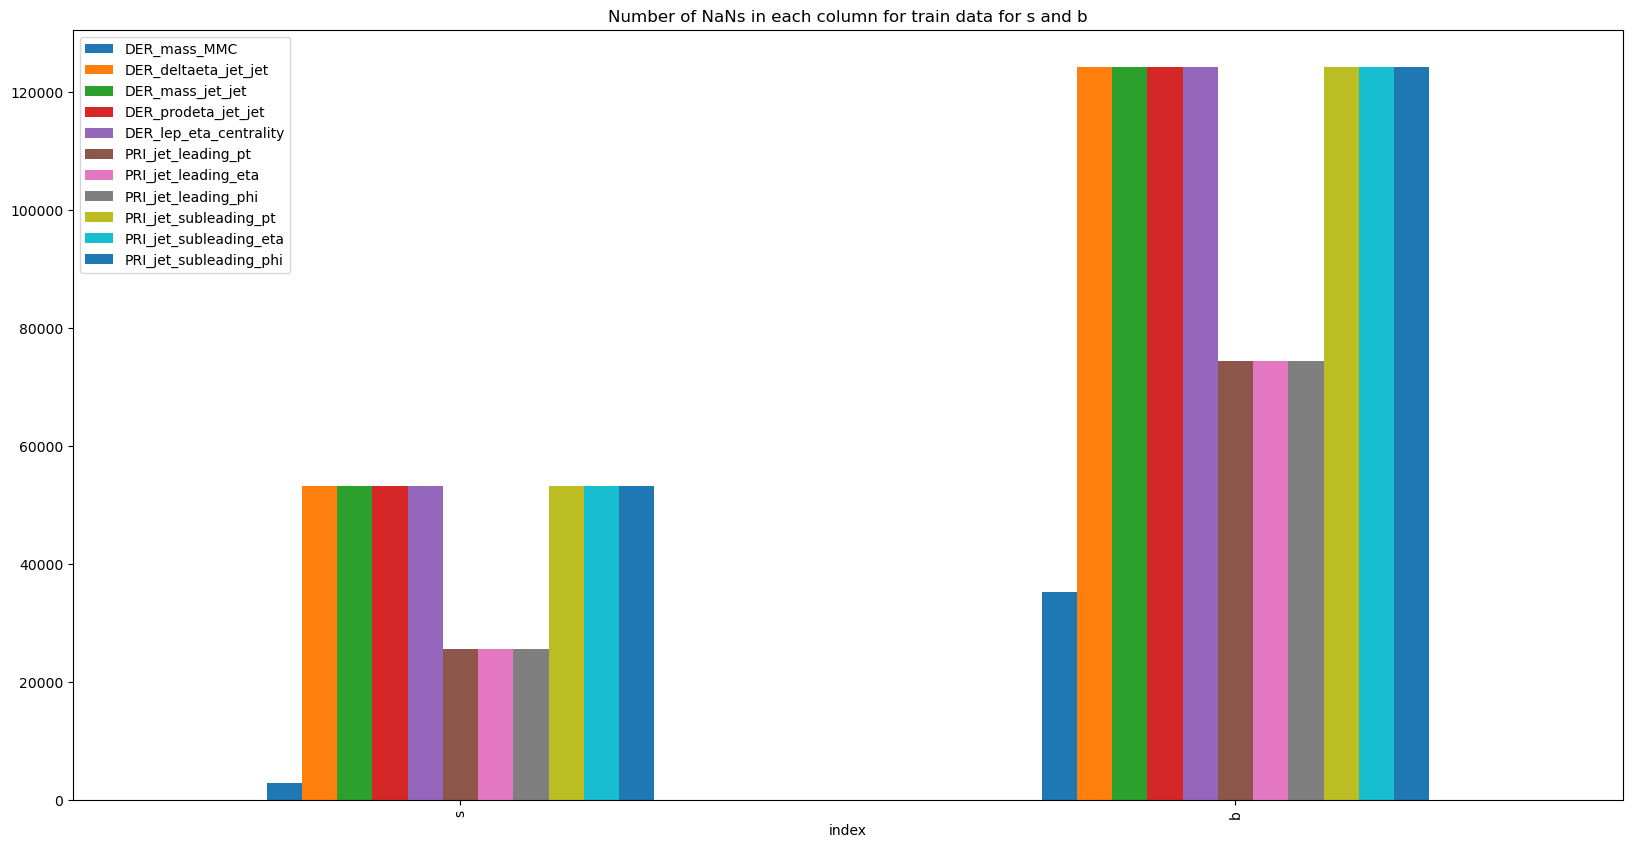

In [174]:
nans_y_df.plot(kind='bar', figsize=(20,10), title='Number of NaNs in each column for train data for s and b')

<AxesSubplot:title={'center':'Ratio of NaNs in each column for train data for s and b'}, xlabel='index'>

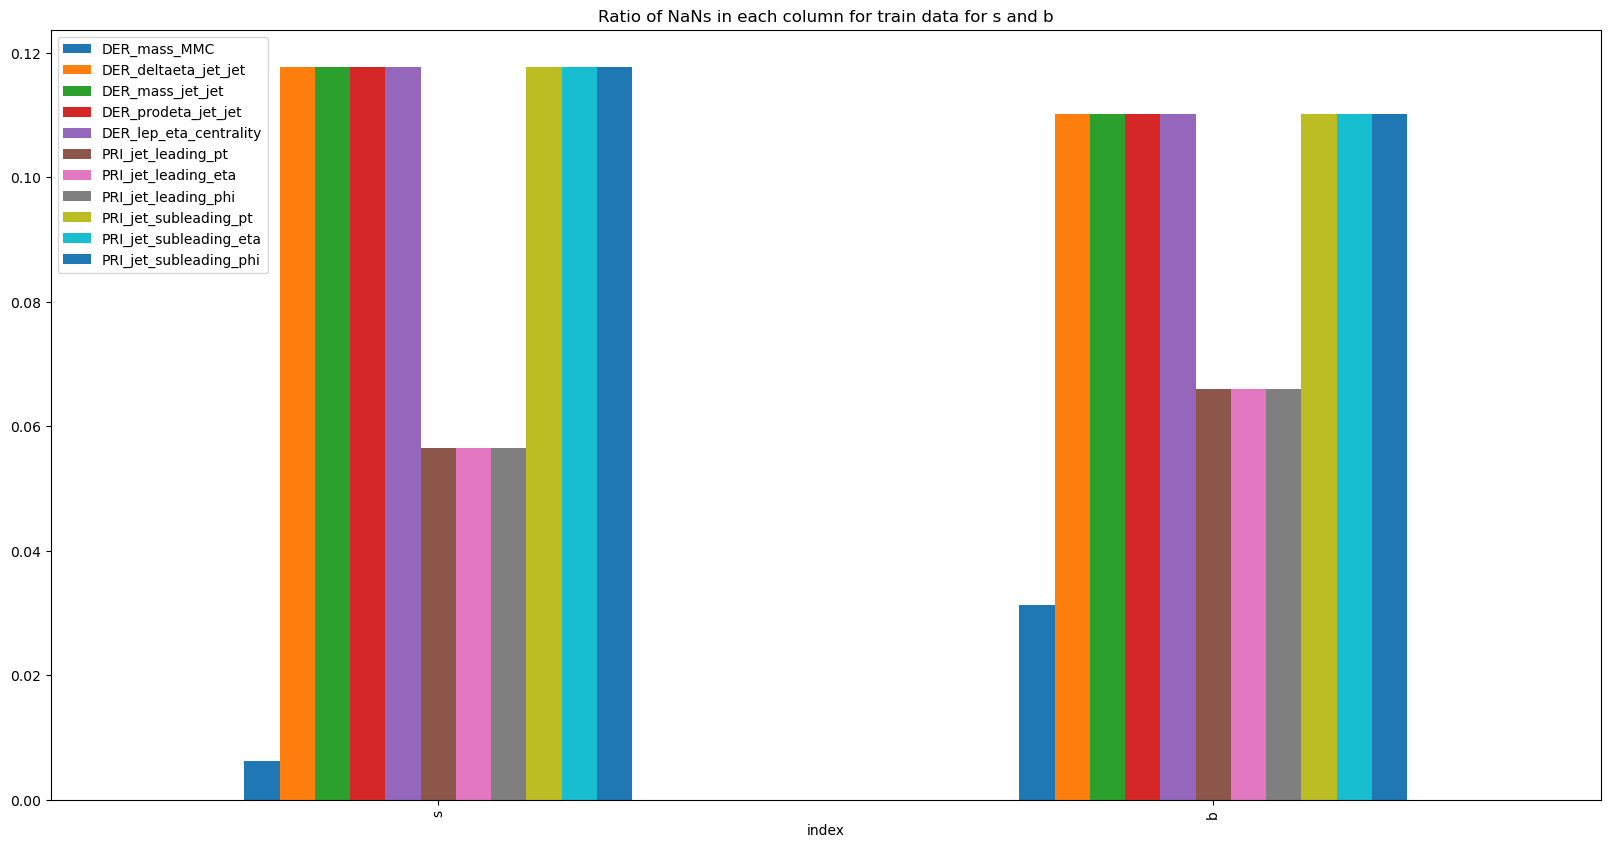

In [176]:
# Ratio
nans_y_ratio_df = nans_y_df.apply(lambda x: x / nans_y_df.sum(axis=1), axis=0) 
nans_y_ratio_df.plot(kind='bar', figsize=(20,10), title='Ratio of NaNs in each column for train data for s and b')

## Observations
- B has more than double the observations of S. It's natural the NaNs in B are roughly double, a part from the DER_mass_MMC which is much more present when the target is S. (or better much less present when the target is B)

164333
85667
0.657332
0.342668
1128327
451725
0.7141075103857342
0.28589248961426583
1.0863726555009252
0.8343133575772055
0.21467994864086945
0.03309325644647297


,DER_mass_MMC,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_lep_eta_centrality,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi
index,,,,,,,,,,,
s,0.167169,0.516788,0.516788,0.516788,0.516788,0.46109,0.46109,0.46109,0.516788,0.516788,0.516788
b,0.832831,0.483212,0.483212,0.483212,0.483212,0.53891,0.53891,0.53891,0.483212,0.483212,0.483212


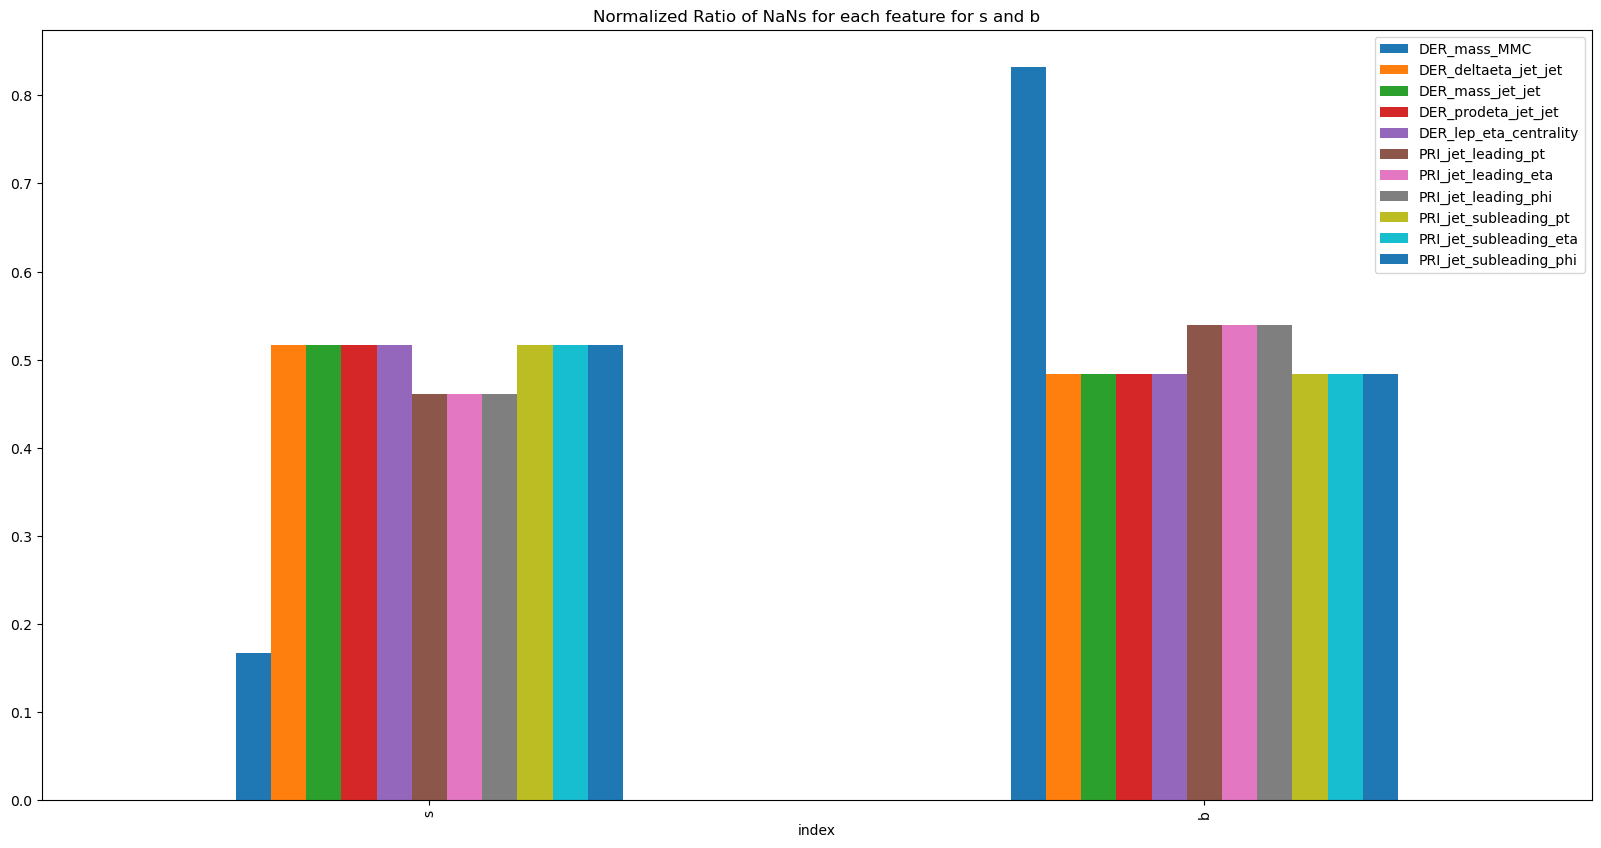

In [202]:
# Use previous ratios so we can really see the difference in distributions and not in absolute values
# In theory this should tell us for each feature how prevalent is NaNs for s and b. If everything is at 0.5 then we have no information, but 
# if there are features with 0.9 for s and 0.1 for b then we can use that to impute NaNs. That is, if we know that 90% of s have a NaN in a feature, 
# we can use this information when we see a NaN in that feature in the test data, we should find a way to add weight to the s class when predicting as a consequence.

nb_b = train_data_raw_df[train_data_raw_df['Prediction'] == 'b'].shape[0]
print(nb_b)
nb_s = train_data_raw_df[train_data_raw_df['Prediction'] == 's'].shape[0]
print(nb_s)
ratio_b = nb_b / (nb_b + nb_s)
ratio_s = nb_s / (nb_b + nb_s)
print(ratio_b)
print(ratio_s)
nb_nans_b = nans_y_df.sum(axis=1)['b']
nb_nans_s = nans_y_df.sum(axis=1)['s']
print(nb_nans_b)
print(nb_nans_s)
ratio_nans_b = nb_nans_b / (nb_nans_b + nb_nans_s)
ratio_nans_s = nb_nans_s / (nb_nans_b + nb_nans_s)
print(ratio_nans_b)
print(ratio_nans_s)
norm_ratio_b = ratio_nans_b / ratio_b
norm_ratio_s = ratio_nans_s / ratio_s
print(norm_ratio_b)
print(norm_ratio_s)
nb_nans_b_feature_0 = nans_y_df['DER_mass_MMC']['b']
nb_nans_s_feature_0 = nans_y_df['DER_mass_MMC']['s']
ratio_nans_b_feature_0 = nb_nans_b_feature_0 / nb_b
ratio_nans_s_feature_0 = nb_nans_s_feature_0 / nb_s
print(ratio_nans_b_feature_0)
print(ratio_nans_s_feature_0)
# Basically we should use Bayes: P(s|NaN) = P(NaN|s) * P(s) / P(NaN) and P(b|NaN) = P(NaN|b) * P(b) / P(NaN) !!!!! How to use this to augment the data? What do we put in W or X? 

nans_y_ratio_df_ = nans_y_ratio_df.apply(lambda x: x / nans_y_ratio_df.sum(axis=0), axis=1) # now we sum over columns, so we really see ratio of NaNs in each column for each class related to target
nans_y_ratio_df_.plot(kind='bar', figsize=(20,10), title='Normalized Ratio of NaNs for each feature for s and b')
nans_y_ratio_df_

## Observations
- When the target is B...